<div align="center">  

# 🔥 __빅데이터__ 프로젝트    
# *201644037 차민재*
    
<br/>
    
## __Subject__
### *연간 화재 통계 분석*
    
<br/><br/><br/><br/><br/>
    
## __프로젝트 유형__
### Pandas & Matplotlib 모듈을 이용한 데이터 분석 시각화
    
<br/><br/><br/><br/><br/>
    
## __Abstract__
##### 겨울로 접어들면서 건조한 날씨 속 화재가 발생하곤 한다
##### 따라서 연간 화재 발생 통계 데이터를 분석해 화재 발생 유형을 조사하여
##### 그에 따른 인명, 재산 피해 규모 데이터의 각출 및 시각화로 원인을 규명하고 예방하기 위함.

<br/><br/><br/><br/><br/>
    
## __데이터 수집__
##### __Where__ | 공공데이터포털
##### __Type__ | CSV
##### __Why__ | 
##### 빅데이터의 특성상, 사용하고자 하는 데이터의 크기는 무한에 가까워야 한다고 생각한다.
##### 하지만,  본 데이터의 크기가 약 __4~5만건에 달하는 행__ 을 지니고 있어 분석에 충분하다고 판단하였다.
</div>

<br/><br/><br/>

## Import

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import font_manager
import seaborn as sns

## Fonts

In [2]:
# Font
font_location = '/Library/Fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

## Read csv
##### csv를 읽어들일 때 encoding 부분에서 많이 애를 먹었다.
##### 기존 교안에서는 UTF-8로 인코딩을 하였으나 안 되는 현상이 발생하였다.
##### 검색을 하여 [__cp949__](https://namu.wiki/w/CP949)로 인코딩 함.

In [3]:
# Read csv
# encoding cp949
data = pd.read_csv('./temp/fire.csv', encoding='cp949', sep=',')
data.head()

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물


## 날짜 파싱
##### 화재가 발생했을 때를 나타내는 데이터의 형식이 __년-월-일-시__ 형태로 나타나있어, 필요한 데이터를 추출하였다.

In [4]:
# 년-월-일 표기
data['onlyDay'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m-%d')

# 년-월 표기
data['onlyMonth'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m')

# 달 포기
data['month'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%m월')

# 일 표기
data['day'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%d')

# __1. 월 별 화재 발생 / 사망 사고__

<br/><br/>

<div align="center">

#### *__선정 이유__*
##### 월 별로 화재 발생수의 추이를 확인하고 그에 따른 사망률을 비교하여
##### 화재에 대해 __좀 더 조심하고 경각심을 기울여야 할 때__ 를 표현하기 위해
    
</div>

<br/>
<br/>

<div align="center">
    
#### *__Figure1__*  
##### __월 별 화재 발생 회수__ 와 __사망 회수__ 를 그래프로 나타내어 __발생 회수에 따른 사망 비율을 결과로 도출__ 함
    
<br/>
<br/>
    
#### *__Figure2__*  
##### 월 별 화재 발생 빈도를 산점도와 히트맵으로 나타내어 비교적 건조한 __연초에 화재가 많이 발생한다__ 는 결과를 도출함.
    
<br/><br/>
    
</div>

## 데이터 전처리

In [5]:
# 월 별 인명피해(소계, 사망, 부상), 재산 피해 소계, 발생 회수 데이터프레임
df_sumByMonth = data.groupby(data['onlyMonth']).sum()

# 월 별 화재 발생 회수 카운트 데이터프레임
df_cntFireOccur= data['화재발생년월일'].groupby(data['onlyMonth']).count()

In [6]:
# df_sumByMonth에 월 별 발생 회수 넣기
df_sumByMonth['발생회수'] = data['onlyMonth'].groupby(data['onlyMonth']).count()

## 시각화 ( Graph )

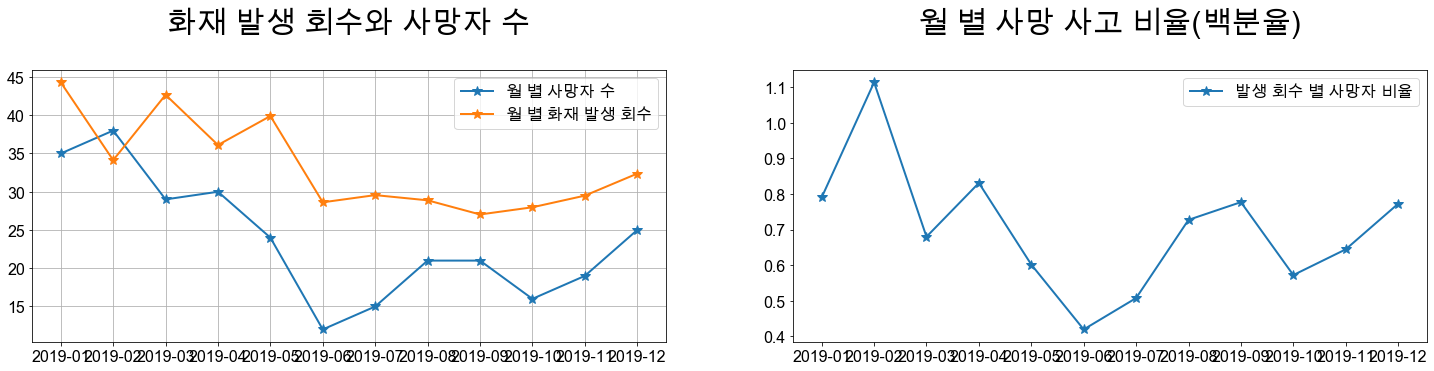

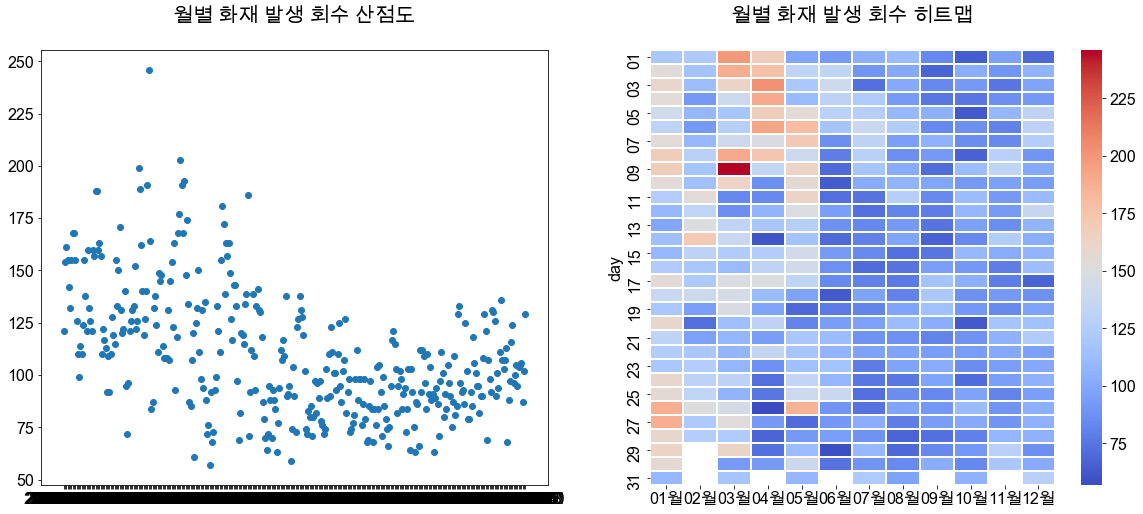

<Figure size 720x720 with 0 Axes>

In [18]:
# Figure 1
# 월 별 사고 발생과 사망 회수 그래프

# Figure 지정
plt.figure(figsize=(25,5))

#  첫 번째 그래프 위치 지정
plt.subplot(121)
# 피규어 내의 첫 번째 그래프 - 월 별 사망자 수 그래프
plt.plot(df_sumByMonth.index, df_sumByMonth['사망'], marker='*',markersize=10,linewidth=2, label='월 별 사망자 수')
# 피규어 내의 두 번째 그래프 - 월 별 화재 발생 회수 그래프
plt.plot(df_sumByMonth.index, df_sumByMonth['발생회수']/100, marker='*',markersize=10,linewidth=2, label='월 별 화재 발생 회수')
# 그래프 설정
plt.grid(True)
plt.legend()
plt.xlabel(u'')
plt.title('화재 발생 회수와 사망자 수\n', size=30)

# 두 번째 그래프 위치 지정
plt.subplot(122)

# 발생 회수에 따른 사망률 백분율 그래프
plt.plot(df_sumByMonth.index, (df_sumByMonth['사망']/df_sumByMonth['발생회수'])*100, marker='*',markersize=10,linewidth=2, label='발생 회수 별 사망자 비율')
plt.legend()
plt.xlabel(u'')
plt.title('월 별 사망 사고 비율(백분율)\n', size=30)



# Figure 2
# 월/일별 화재 발생 회수

# Figure 생성
figure2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))


# 월 / 일별 화재 발생 회수 산점도
df_Cnt = data.groupby(data['onlyDay']).sum().iloc[:,[1,2]]
df_Cnt['발생회수'] = data['onlyDay'].groupby(data['onlyDay']).count()
ax1.scatter(df_Cnt.index, df_Cnt['발생회수'])
ax1.set_title('월별 화재 발생 회수 산점도\n', size=20)

# 데이터 전처리
df_DayCount = pd.DataFrame()
monthFilter = ['01월','02월','03월','04월','05월','06월','07월','08월','09월','10월','11월','12월']
for i in monthFilter:
    mask = ( data.month== i )
    df_temp = data.loc[mask, ['사망']].groupby(data['day']).count()
    df_DayCount = df_DayCount.append(df_temp.T)
df_DayCount.index = monthFilter
plt.figure(figsize=(10,10))

ax2.set_title('월별 화재 발생 회수 히트맵\n', size=20)
sns.heatmap(df_DayCount.T, linewidths=1,cmap='coolwarm', ax=ax2)

# __2. 화재 유형, 지역 별 발생 비율과 재산 피해의 정도__

<br/><br/>

<div align="center">

#### *__선정 이유__*
##### 화재 유형과 지역에 따른 화재 발생 비율을 조사하여
##### __발생량과 재산 피해와의 관계를 분석__ 하기 위함.
    
</div>

<br/>
<br/>

<div align="center">
    
#### *__Figure3__*  
    
</div>

<br/>

##### __| 화재 유형 별 그래프__  
##### 파이차트를 통해 비율을 표시하여 발생율과 피해 금액은 비례하지 않을 때도 있다는 결과를 도출하였다.

<br/>
<br/>

##### __| 시/도 별 그래프__  
##### 화재 발생 위치에 따른 발생 비율과 피해액을 제시하여 발생 비율과 피해액이 비례하지 않는다는 결과를 이끌어냄.
    
<br/>
<br/>

## 데이터 전처리

In [8]:
# Create DataFrame
df_dmgPerCase = data.groupby(data['화재유형']).sum()

# 화재 유형 별 화재 발생 건수
df_dmgPerCase['count'] = data['화재유형'].groupby(data['화재유형']).count()

# 화재 유형 별 건당 피해 액 수
df_dmgPerCase['건당피해'] = df_dmgPerCase['재산피해소계']/df_dmgPerCase['count']

# 필요한 열만 잘라내기
df_dmgPerCase = df_dmgPerCase.iloc[:,[0,3,4,5]]

# 정렬
df_srtDmgPerCase = df_dmgPerCase.sort_values('건당피해', ascending=False)

# 출력
df_srtDmgPerCase

,인명피해(명)소계,재산피해소계,count,건당피해
화재유형,,,,
"선박,항공기",27,60005851,108,555609.731481
"위험물,가스제조소등",19,6805927,29,234687.137931
임야,133,198547953,2211,89800.069199
"건축,구조물",1993,552840022,26025,21242.652142
"자동차,철도차량",177,32663468,4710,6934.918896
기타(쓰레기 화재등),166,7633013,7020,1087.323789


## 시각화 ( Pie )

Text(0, 0.5, '')

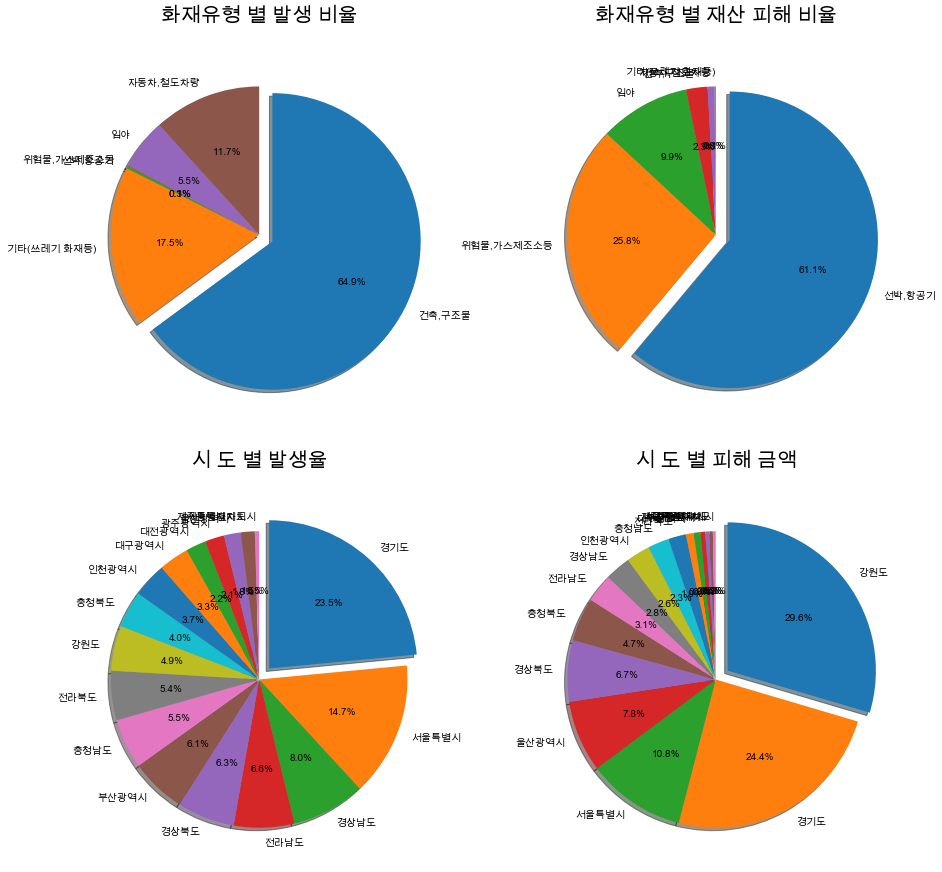

In [9]:
# 피규어 생성
fig1= plt.figure()

# 1행 차트

# 파이 노출도 설정
explode_value = (0.1, 0, 0, 0, 0, 0)

# 첫 번째 파이 위치 설정
ax1 = fig1.add_subplot(221)
# 첫 번째 파이 그리기
firepie = df_dmgPerCase['count'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax1)
firepie.set_title("화재유형 별 발생 비율\n", fontsize=20)
firepie.set_ylabel("")

# 두 번째 파이 위치 설정
ax2 = fig1.add_subplot(222)
# 두 번째 파이 그리기
damagepie = df_srtDmgPerCase['건당피해'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax2)
damagepie.set_title("화재유형 별 재산 피해 비율\n", fontsize=20)
damagepie.set_ylabel("")


# 2행 차트

# 데이터 전처리
# 시도별 발생 회수
df_CntLoc=data['시도'].groupby(data['시도']).count()
df_CntLoc=df_CntLoc.sort_values(ascending=False)

# 시도별 재산피해소계 합산
df_DmgLoc=data['재산피해소계'].groupby(data['시도']).sum()
df_DmgLoc=df_DmgLoc.sort_values(ascending=False)


# 세 번째 파이 위치 설정
ax3 = fig1.add_subplot(223)
# 두 번째 행 파이 노출도 설정
explode_value = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# 세 번째 파이 그리기
locOccrPie = df_CntLoc.plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax3)
locOccrPie.set_title("시 도 별 발생율\n", fontsize=20)
locOccrPie.set_ylabel("")

# 네 번째 파이 위치 설정
ax4 = fig1.add_subplot(224)
# 네 번째 파이 그리기
locDmgPie = df_DmgLoc.plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax4)
locDmgPie.set_title("시 도 별 피해 금액\n", fontsize=20)
locDmgPie.set_ylabel("")

# __2-1. 경기도와 강원도 관련 데이터__

<br/><br/>

<div align="center">

#### *__선정 이유__*
##### 지역 데이터를 분석한 파이차트에서 가장 높은 비율이 나타난 경기도와 강원도를 심층 분석해
##### 해당 화재의 __발생 장소, 화재 유형, 착화물__ 에 대한 데이터를 비교하여
##### 해당 지역의 __위험도가 높은__ 장소, 유형, 불이 붙는 물건에 대한 주의를 환기시키기 위함
    
</div>

<br/>
<br/>

<div align="center">
    
#### *__Temp Frame1__*  
    
</div>

<br/>

##### __| 강원도 재산피해 데이터__  
##### 시/도 별 재산(금액) 피해 비율이 강원도가 가장 높게 나타났기 때문에 이유를 찾아보고자 함.
##### 임야 지역에서 화재가 많이 발생하여 재산 피해가 가장 많이 발생함

<br/>
<br/>

<div align="center">
    
#### *__Temp Frame2__*  
    
</div>

<br/>

##### __| 경기도 발생 관련 데이터__  
##### 경기도에서 어디서 제일 많이 불이 났는지, 왜, 어디에 불이 붙어서 불이 많이 났는지의 데이터를 추출
    
<br/>
<br/>

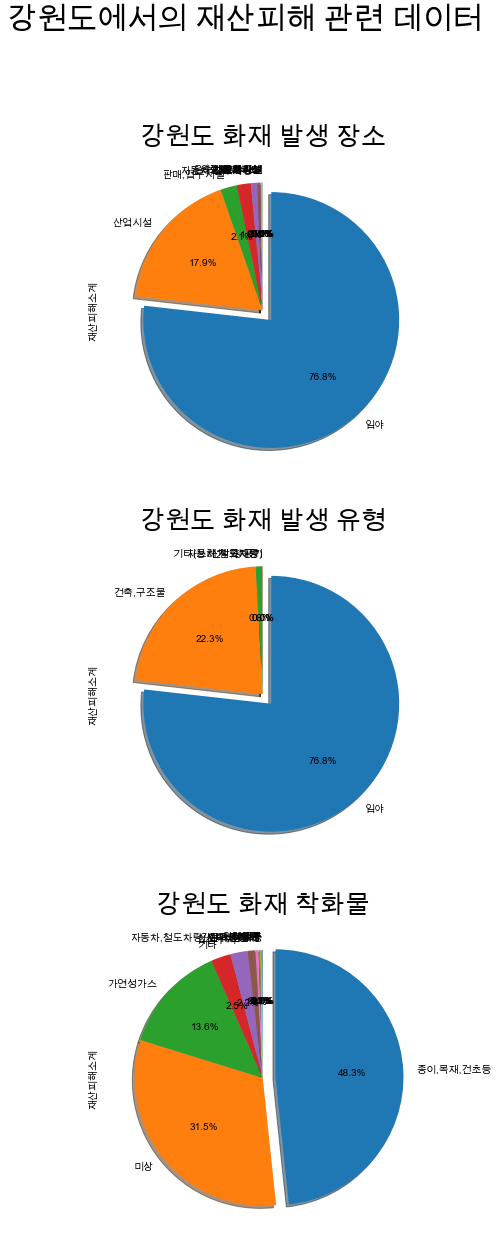

In [10]:
# 임시 피규어 생성
tempFigure = plt.figure()

tempFigure.suptitle('강원도에서의 재산피해 관련 데이터', fontsize=30)

# 위치 생성
ax1 = tempFigure.add_subplot(311)
ax2 = tempFigure.add_subplot(312)
ax3 = tempFigure.add_subplot(313)


# 첫 번째 그래프 - 강원도에서 어디서 가장 많이 불이 났나.
mask = ( data.시도 == '강원도')
df_temp = data.loc[mask, ['재산피해소계']].groupby(data['장소대분류']).sum()
df_temp=df_temp.sort_values('재산피해소계', ascending=False)

explode_value=(0.1,0,0,0,0,0,0,0,0,0,0,0,0)
locGang = df_temp.plot.pie(figsize=(20,20), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax1, y='재산피해소계')
locGang.set_title('강원도 화재 발생 장소', size=25)
ax1.get_legend().remove()

# 두 번째 그래프 - 강원도에서 어떤 화재유형으로 인해 젤 많이 났는지.
mask = ( data.시도 == '강원도')
df_temp = data.loc[mask, ['재산피해소계']].groupby(data['화재유형']).sum()
df_temp=df_temp.sort_values('재산피해소계', ascending=False)

explode_value=(0.1,0,0,0,0)
locGang = df_temp.plot.pie(figsize=(20,20), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax2, y='재산피해소계')
locGang.set_title('강원도 화재 발생 유형', size=25)
ax2.get_legend().remove()

# 세 번째 그래프 - 강원도에서 어디에 불이 제일 먼저 붙어서 화재가 많이 났는지.
mask = ( data.시도 == '강원도')
df_temp = data.loc[mask, ['재산피해소계']].groupby(data['최초착화물대분류']).sum()
df_temp=df_temp.sort_values('재산피해소계', ascending=False)

explode_value=(0.1,0,0,0,0,0,0,0,0,0,0,0,0)
locGang = df_temp.plot.pie(figsize=(20,20), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax3, y='재산피해소계')
locGang.set_title('강원도 화재 착화물', size=25)
ax3.get_legend().remove()

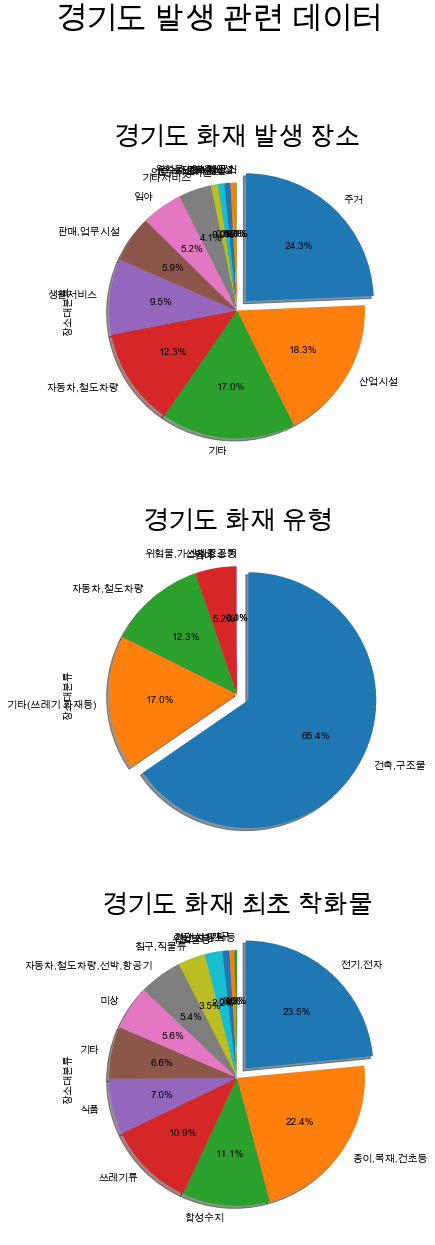

In [11]:
# 임시 피규어 생성
tempFigure = plt.figure()

tempFigure.suptitle('경기도 발생 관련 데이터', fontsize=30)

# 위치 생성
ax1 = tempFigure.add_subplot(311)
ax2 = tempFigure.add_subplot(312)
ax3 = tempFigure.add_subplot(313)


# 첫 번째 그래프 - 강원도에서 어디서 가장 많이 불이 났나.
mask = ( data.시도 == '경기도')
df_temp = data.loc[mask, ['장소대분류']].groupby(data['장소대분류']).count()
df_temp.index.name = None
df_temp=df_temp.sort_values('장소대분류', ascending=False)

explode_value=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0)
locGang = df_temp.plot.pie(figsize=(20,20), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax1, y='장소대분류')
locGang.set_title('경기도 화재 발생 장소', size=25)
ax1.get_legend().remove()

# 두 번째 그래프 - 강원도에서 어떤 화재유형으로 인해 젤 많이 났는지.
mask = ( data.시도 == '경기도')
df_temp = data.loc[mask, ['장소대분류']].groupby(data['화재유형']).count()
df_temp.index.name = None
df_temp=df_temp.sort_values('장소대분류', ascending=False)

explode_value=(0.1,0,0,0,0,0)
locGang = df_temp.plot.pie(figsize=(20,20), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax2, y='장소대분류')
locGang.set_title('경기도 화재 유형', size=25)
ax2.get_legend().remove()

# 세 번째 그래프 - 강원도에서 어디에 불이 제일 먼저 붙어서 화재가 많이 났는지.
mask = ( data.시도 == '경기도')
df_temp = data.loc[mask, ['장소대분류']].groupby(data['최초착화물대분류']).count()
df_temp.index.name = None
df_temp=df_temp.sort_values('장소대분류', ascending=False)

explode_value=(0.1,0,0,0,0,0,0,0,0,0,0,0,0)
locGang = df_temp.plot.pie(figsize=(20,20), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax3, y='장소대분류')
locGang.set_title('경기도 화재 최초 착화물', size=25)
ax3.get_legend().remove()

# __3. 발화 열원 / 요인 , 착화물 별 데이터__

<br/><br/>

<div align="center">

#### *__선정 이유__*
##### 발화 열원, 발화 요인, 최초 착화물 별 통계를 파이 차트를 이용하여
##### 각 주제에 따른 발생율, 재산피해 비율, 사망률을 비교하여 위험도를 인식시키기 위함
    
</div>

<br/>
<br/>

<div align="center">
    
#### *__Figure4__*  
    
</div>

<br/>

##### __| 발화 데이터__  
##### 발화 열원, 발화 요인, 최초착화물 별 데이터를 분석
##### 각 요인 별 발생 비율을 나타내 주로 주의해야 하는 부분을 시사함

    
<br/>
<br/>

## 데이터 전처리

In [12]:
# 발화 열원 대분류

# 발화 열원 대분류 발생 데이터프레임
df_ignitionLargeOccr=data['발화열원대분류'].groupby(data['발화열원대분류']).count()
df_ignitionLargeOccr=df_ignitionLargeOccr.sort_values(ascending=False)

# 발화 열원 대분류 재산피해
df_ignitionLargeDmg=data['재산피해소계'].groupby(data['발화열원대분류']).sum()
df_ignitionLargeDmg=df_ignitionLargeDmg.sort_values(ascending=False)

# 발화 열원 대분류 사망률
df_ignitionLargeDeath = data['사망'].groupby(data['발화열원대분류']).sum()
df_ignitionLargeDeath = df_ignitionLargeDeath.sort_values(ascending=False)


# 발화 요인 대분류

# 발화 요인 대분류 발생 데이터프레임
df_ignitionFactorOccr=data['발화요인대분류'].groupby(data['발화요인대분류']).count()
df_ignitionFactorOccr=df_ignitionFactorOccr.sort_values(ascending=False)

# 발화 요인 대분류 재산피해
df_ignitionFactorDmg=data['재산피해소계'].groupby(data['발화요인대분류']).sum()
df_ignitionFactorDmg=df_ignitionFactorDmg.sort_values(ascending=False)

# 발화 요인 대분류 사망률
df_ignitionFactorDeath = data['사망'].groupby(data['발화요인대분류']).sum()
df_ignitionFactorDeath = df_ignitionFactorDeath.sort_values(ascending=False)


# 최초 착화물 대분류

# 최초 착화물 대분류 발생 데이터 프레임
df_ignitionComplexOccr=data['최초착화물대분류'].groupby(data['최초착화물대분류']).count()
df_ignitionComplexOccr=df_ignitionComplexOccr.sort_values(ascending=False)

# 최초 착화물 대문류 재산피해
df_ignitionComplexDmg=data['재산피해소계'].groupby(data['최초착화물대분류']).sum()
df_ignitionComplexDmg=df_ignitionComplexDmg.sort_values(ascending=False)

# 최초 착화물 대분류 사망률
df_ignitionComplexDeath = data['사망'].groupby(data['최초착화물대분류']).sum()
df_ignitionComplexDeath = df_ignitionComplexDeath.sort_values(ascending=False)

# 시각화 [ Pie ]

Text(0, 0.5, '')

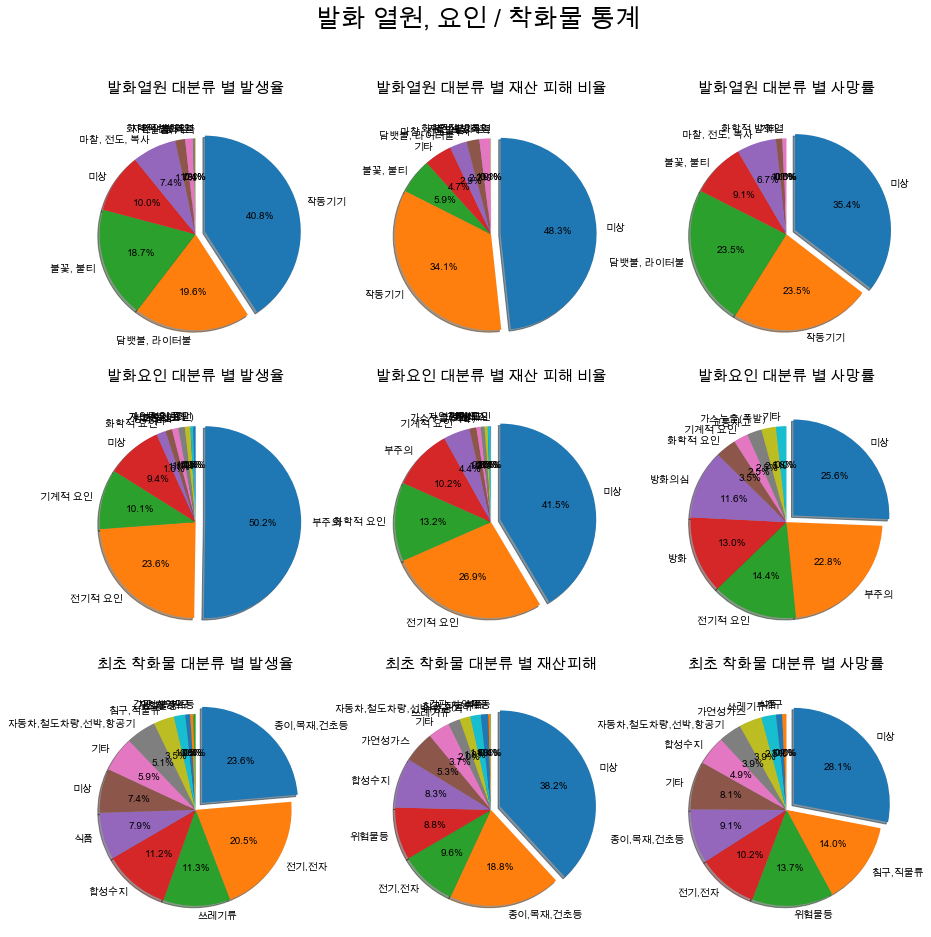

In [13]:
# Make figure
fig4= plt.figure()
fig4.suptitle('발화 열원, 요인 / 착화물 통계',fontsize=25)

# 파이 위치 설정
ax1 = fig4.add_subplot(331)
ax2 = fig4.add_subplot(332)
ax3 = fig4.add_subplot(333)

ax4 = fig4.add_subplot(334)
ax5 = fig4.add_subplot(335)
ax6 = fig4.add_subplot(336)

ax7 = fig4.add_subplot(337)
ax8 = fig4.add_subplot(338)
ax9 = fig4.add_subplot(339)

# 파이 그래프 강조 값 설정
explode_value = (0.1,0,0,0,0,0,0,0,0)

# 첫 번째 행

# 첫 번째 파이 - 발화 열원 대분류 별 발생량
ignitionLargeOccrPie= df_ignitionLargeOccr.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax1)
ignitionLargeOccrPie.set_title("발화열원 대분류 별 발생율\n", fontsize=15)
ignitionLargeOccrPie.set_ylabel("")

# 두 번째 파이 - 발화 열원 대분류 별 재산 피해 비율
ignitionLargeDmgPie= df_ignitionLargeDmg.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90,
                                                  counterclock=False, explode = explode_value, shadow=True, ax = ax2)
ignitionLargeDmgPie.set_title("발화열원 대분류 별 재산 피해 비율\n", fontsize=15)
ignitionLargeDmgPie.set_ylabel("")

# 세 번째 파이 - 발화 열원 대분류 별 사망 비율
ignitionLargeDeathPie= df_ignitionLargeDeath.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90,
                                                  counterclock=False, explode = explode_value, shadow=True, ax = ax3)
ignitionLargeDeathPie.set_title("발화열원 대분류 별 사망률\n", fontsize=15)
ignitionLargeDeathPie.set_ylabel("")


# 두 번째 행

explode_value = (0.1,0,0,0,0,0,0,0,0,0,0)

# 네 번째 파이 - 발화 요인 대분류 별 발생량
ignitionFactorOccrPie= df_ignitionFactorOccr.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax4)
ignitionFactorOccrPie.set_title("발화요인 대분류 별 발생율\n", fontsize=15)
ignitionFactorOccrPie.set_ylabel("")

# 다섯 번째 파이 - 발화 열원 대분류 별 재산 피해 비율
ignitionFactorDmgPie= df_ignitionFactorDmg.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90,
                                                  counterclock=False, explode = explode_value, shadow=True, ax = ax5)
ignitionFactorDmgPie.set_title("발화요인 대분류 별 재산 피해 비율\n", fontsize=15)
ignitionFactorDmgPie.set_ylabel("")

# 여섯 번째 파이 - 발화 열원 대분류 별 사망 비율
ignitionFactorDeathPie= df_ignitionFactorDeath.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90,
                                                  counterclock=False, explode = explode_value, shadow=True, ax = ax6)
ignitionFactorDeathPie.set_title("발화요인 대분류 별 사망률\n", fontsize=15)
ignitionFactorDeathPie.set_ylabel("")


# 세 번째 행

explode_value=(0.1,0,0,0,0,0,0,0,0,0,0,0,0)

# 일곱 번째 파이 - 최초 착화물 대분류 별 발생량
ignitionComplexOccrPie= df_ignitionComplexOccr.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax7)
ignitionComplexOccrPie.set_title("최초 착화물 대분류 별 발생율\n", fontsize=15)
ignitionComplexOccrPie.set_ylabel("")

# 여덟 번째 파이 - 최초 착화물 대분류 별 재산피해
ignitionComplexDmgPie= df_ignitionComplexDmg.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax8)
ignitionComplexDmgPie.set_title("최초 착화물 대분류 별 재산피해\n", fontsize=15)
ignitionComplexDmgPie.set_ylabel("")

# 아홉 번째 파이 - 최초 착화물 대분류 별 사망률
ignitionComplexDeathPie= df_ignitionComplexDeath.plot.pie(figsize=(15, 15), autopct='%.1f%%',  startangle=90, 
                                                    counterclock=False, explode = explode_value, shadow=True, ax = ax9)
ignitionComplexDeathPie.set_title("최초 착화물 대분류 별 사망률\n", fontsize=15)
ignitionComplexDeathPie.set_ylabel("")

# __4. 장소 별 데이터__

<br/><br/>

<div align="center">

#### *__선정 이유__*
##### 장소에 따른 부상과 사망수를 그래프로 표현해 발생 정도를 산정하고
##### 그 수들의 비율을 추출해 장소에 따른 사망 위험도를 표현하고자 함
    
</div>

<br/>
<br/>

<div align="center">
    
#### *__Figure5__*  
    
</div>

<br/>

##### __| 장소 별 부상 / 사망__  
#####  장소 별 부상 수와 사망 수를 그래프로 나타내어 부상에 다른 사망 정도를 나타냄.

<br/><br/>

##### __| 월 / 장소 별 화재 발생 추이__
##### 장소 별로 월마다 화재 발생 추이가 어떻게 변화하는지 나타냄.
    
<br/>
<br/>

## 데이터 전처리

In [14]:
# 장소 별 사망, 부상
df_deatLoc=data['사망'].groupby(data['장소대분류']). sum()
df_injuredLoc=data['부상'].groupby(data['장소대분류']).sum()

df_temp = pd.DataFrame()

df_temp = data['장소대분류'].groupby(data['장소대분류']).count().index.to_frame()
df_temp.index = np.arange(0,15)

df_LocOccr = pd.DataFrame(index= monthFilter)
for i in df_temp['장소대분류']:
    mask1 = (data.장소대분류 == i)
    df = data.loc[mask1,:].groupby(data['month']).count().iloc[:,0]
    df=df.to_frame()
    df.rename(columns={'화재발생년월일':i},inplace=True)
    df_LocOccr=df_LocOccr.join(df)

## 시각화

In [15]:
df_perRatio = df_deatLoc/df_injuredLoc * 100

posx and posy should be finite values
posx and posy should be finite values


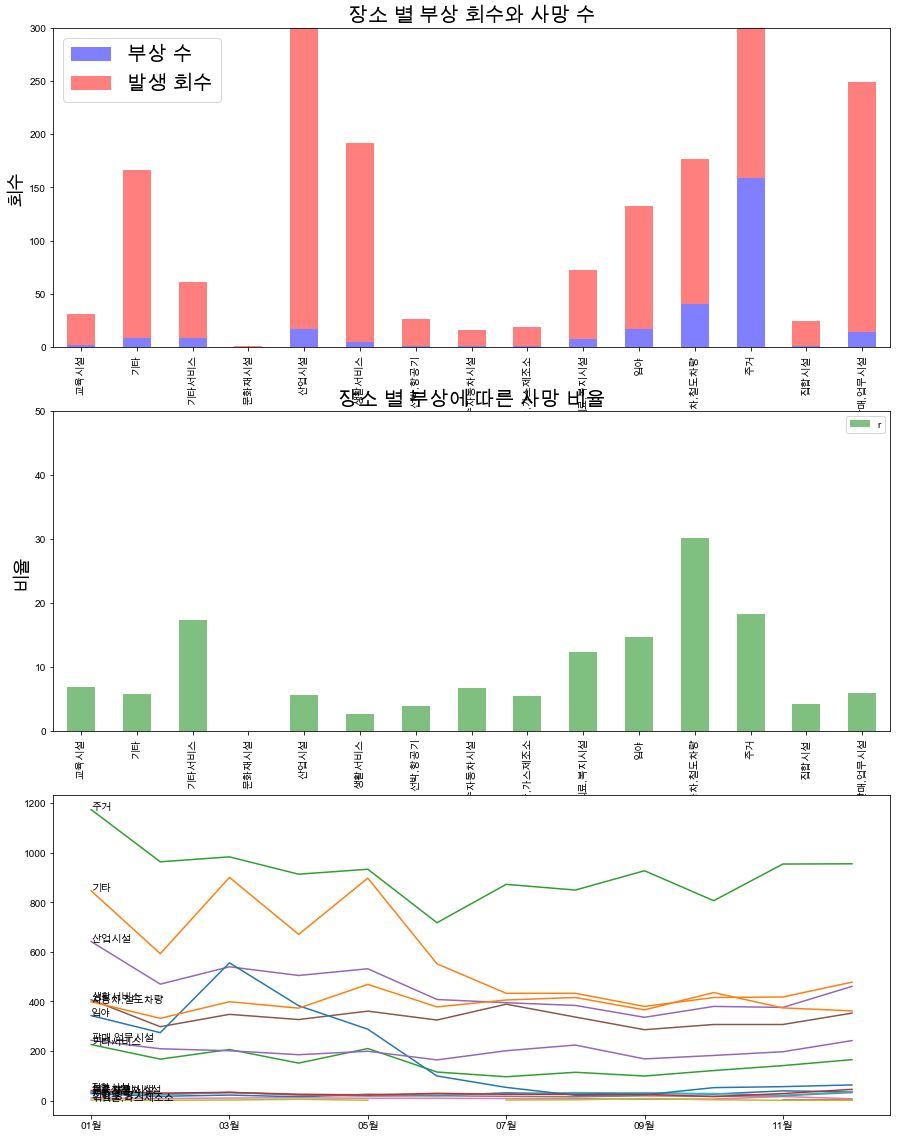

In [16]:
# 피규어 생성
fig5 = plt.figure(figsize=(15,20))

# 파이 위치 설정
ax1 = fig5.add_subplot(311)

# 그래프 생성
alpha = 0.5
# 사망, 부상 데이터 기반의 그래프
p1 = df_deatLoc.plot.bar(color='b', alpha=alpha, ax=ax1)
p2 = df_injuredLoc.plot.bar(color='r', alpha=alpha, bottom=df_deatLoc, ax=ax1) # stacked bar chart
# 그래프 세팅
plt.title('장소 별 부상 회수와 사망 수', fontsize=20)
plt.ylabel('회수', fontsize=18)
plt.xticks(fontsize=10)
plt.legend(('부상 수', '발생 회수'), fontsize=20)
plt.ylim(0, 300)

# 그래프 위치 설정
ax2 = fig5.add_subplot(312)

# 그래프 그림
p3 = df_perRatio.plot.bar(color='g', alpha=alpha, ax=ax2)
plt.title('장소 별 부상에 따른 사망 비율', fontsize=20)
plt.ylabel('비율', fontsize=18)
plt.xticks(fontsize=10)
plt.legend('ratio', fontsize=10)
plt.ylim(0, 50)


# 그래프 위치 설정
ax3 = fig5.add_subplot(313)

# 포문을 돌면서 그래프 그림
for i in df_temp['장소대분류']:
    df_LocOccr[i].plot(ax = ax3)
    plt.text(0, df_LocOccr[i][0], i) # (x,y) 좌표를 지정하여 문자열 출력하기
    
plt.show()

# __5. 주거 , 산업시설 , 임야 , 기타__

<br/><br/>

<div align="center">

#### *__선정 이유__*
##### *'4. 장소별 데이터'* 의 세 번째 그래프의 결과에서 가장 높은 변동을 보인 데이터를 가져와
##### 중분류 / 소분류 장소에 대한 통계를 나타냄
    
</div>

<br/>
<br/>

<div align="center">
    
#### *__Figure6__*  & *__Figure7__*
    
</div>

<br/>

##### __| 추이 그래프 내 표본 데이터__
#####  변동률이 급격한 그래프 4개를 추출해 각 장소에 따른 중분류 / 소분류 통계를 나타냄
    
<br/>
<br/>

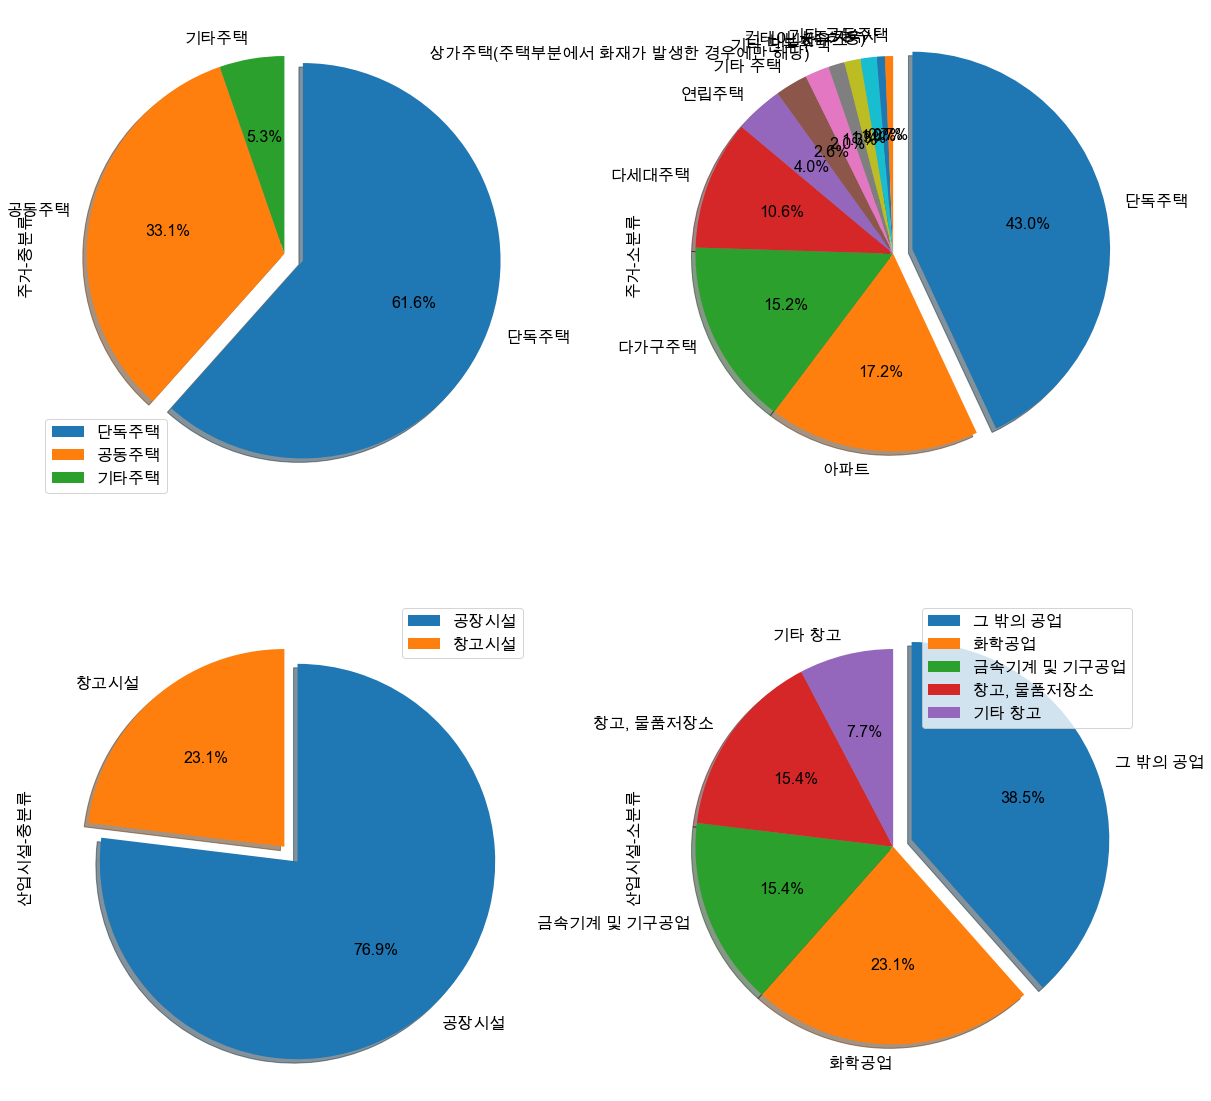

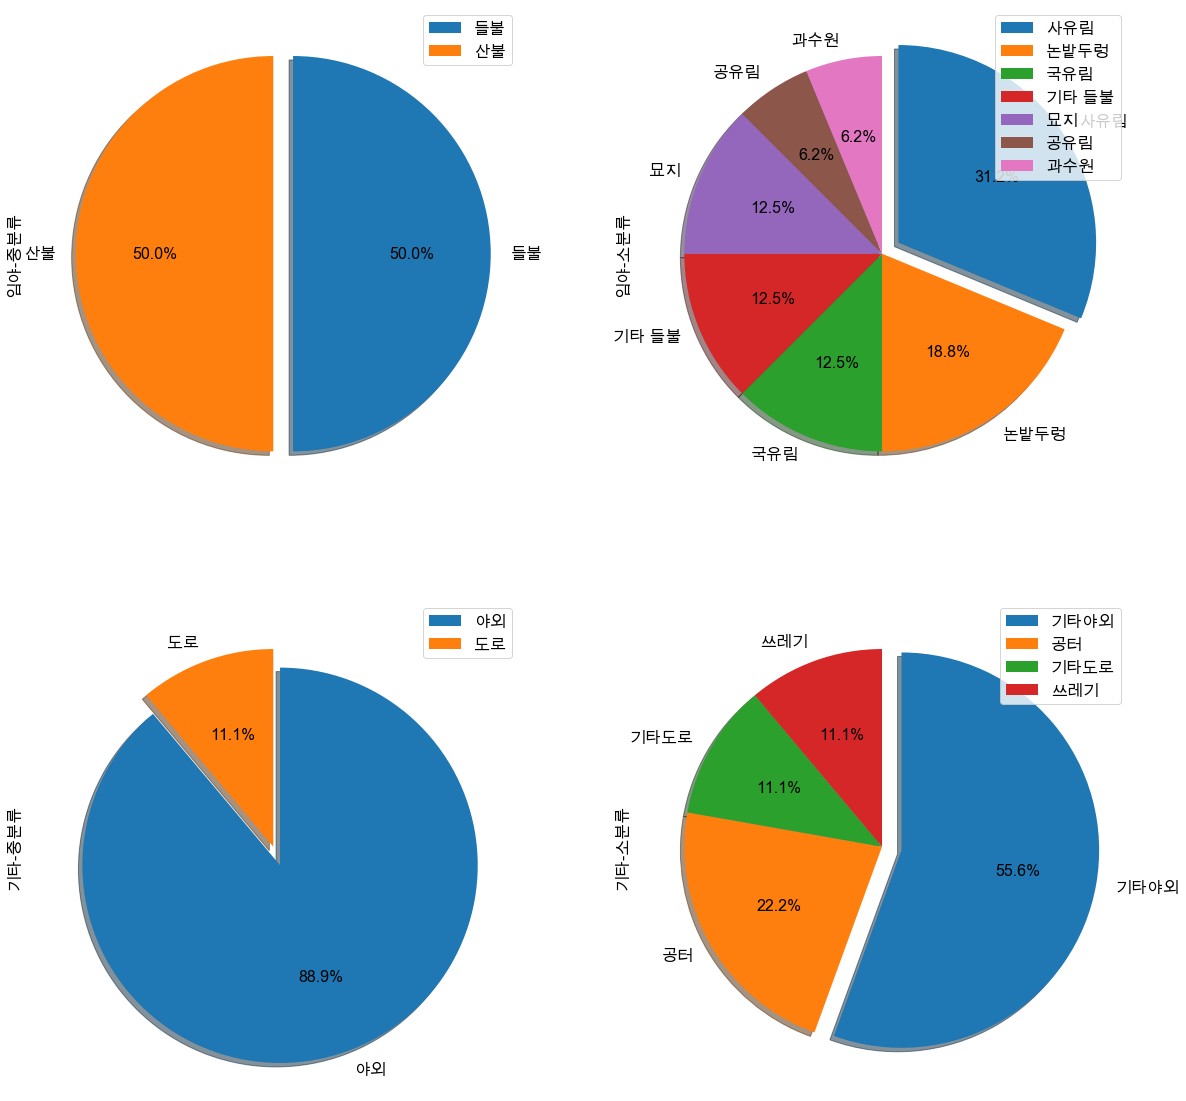

In [17]:
matplotlib.rcParams['font.size'] = 16.0

# Make figure
fig6= plt.figure()

# 파이 위치 설정
ax1 = fig6.add_subplot(221)
ax2 = fig6.add_subplot(222)

ax3 = fig6.add_subplot(223)
ax4 = fig6.add_subplot(224)

fig7 = plt.figure()

ax5 = fig7.add_subplot(221)
ax6 = fig7.add_subplot(222)

ax7 = fig7.add_subplot(223)
ax8 = fig7.add_subplot(224)

# 첫 번째 피규어
# 1행 첫 번째
explode_value = (0.1 , 0, 0)
mask1 = (data.장소대분류 == '주거') & (data.사망 > 0)
df_locMiddle = data.loc[mask1,:].groupby(data['장소중분류']).count().iloc[:,0].to_frame()
df_locMiddle = df_locMiddle.sort_values('화재발생년월일', ascending=False)
df_locMiddle.rename(columns={'화재발생년월일':'주거-중분류'}, inplace=True)
df_locMiddlePie = df_locMiddle.plot.pie(figsize=(20,20), y='주거-중분류', autopct='%.1f%%',  startangle=90, 
                                            counterclock=False, explode = explode_value, shadow=True, ax =ax1)

# 1행 두 번째
explode_value = (0.1 ,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
df_locSmall = data.loc[mask1,:].groupby(data['장소소분류']).count().iloc[:,0].to_frame()
df_locSmall = df_locSmall.sort_values('화재발생년월일',ascending=False)
df_locSmall.rename(columns={'화재발생년월일':'주거-소분류'}, inplace=True)
df_locSmallPie = df_locSmall.plot.pie(figsize=(20,20),y='주거-소분류' ,autopct='%.1f%%',  startangle=90, 
                                            counterclock=False, explode = explode_value, shadow=True, ax = ax2)
ax2.get_legend().remove()

# 2행 첫 번째
explode_value = (0.1 , 0)
mask1 = (data.장소대분류 == '산업시설') & (data.사망 > 0)
df_locMiddle = data.loc[mask1,:].groupby(data['장소중분류']).count().iloc[:,0].to_frame()
df_locMiddle = df_locMiddle.sort_values('화재발생년월일',ascending=False)
df_locMiddle.rename(columns={'화재발생년월일':'산업시설-중분류'}, inplace=True)
df_locMiddlePie = df_locMiddle.plot.pie(figsize=(20,20), y='산업시설-중분류', autopct='%.1f%%',  startangle=90, 
                                            counterclock=False, explode = explode_value, shadow=True, ax =ax3)

# 2행 두 번째
explode_value = (0.1 ,0,0,0,0)
df_locSmall = data.loc[mask1,:].groupby(data['장소소분류']).count().iloc[:,0].to_frame()
df_locSmall = df_locSmall.sort_values('화재발생년월일',ascending=False)
df_locSmall.rename(columns={'화재발생년월일':'산업시설-소분류'}, inplace=True)
df_locSmallPie = df_locSmall.plot.pie(figsize=(20,20),y='산업시설-소분류', autopct='%.1f%%',  startangle=90, 
                                            counterclock=False, explode = explode_value, shadow=True, ax = ax4)


# 두 번째 피규어
# 1행 첫 번째
explode_value = (0.1 , 0)
mask1 = (data.장소대분류 == '임야') & (data.사망 > 0)
df_locMiddle = data.loc[mask1,:].groupby(data['장소중분류']).count().iloc[:,0].to_frame()
df_locMiddle = df_locMiddle.sort_values('화재발생년월일', ascending=False)
df_locMiddle.rename(columns={'화재발생년월일':'임야-중분류'}, inplace=True)
df_locMiddlePie = df_locMiddle.plot.pie(figsize=(20,20),y='임야-중분류', autopct='%.1f%%',  startangle=90, 
                                            counterclock=False, explode = explode_value, shadow=True, ax =ax5)

# 1행 두 번째
explode_value = (0.1 ,0, 0, 0, 0, 0, 0)
df_locSmall = data.loc[mask1,:].groupby(data['장소소분류']).count().iloc[:,0].to_frame()
df_locSmall = df_locSmall.sort_values('화재발생년월일', ascending=False)
df_locSmall.rename(columns={'화재발생년월일':'임야-소분류'}, inplace=True)
df_locSmallPie = df_locSmall.plot.pie(figsize=(20,20),y='임야-소분류', autopct='%.1f%%',  startangle=90, 
                                            counterclock=False, explode = explode_value, shadow=True, ax = ax6)

# 2행 첫 번째
explode_value = (0.1 , 0)
mask1 = (data.장소대분류 == '기타') & (data.사망 > 0)
df_locMiddle = data.loc[mask1,:].groupby(data['장소중분류']).count().iloc[:,0].to_frame()
df_locMiddle = df_locMiddle.sort_values('화재발생년월일', ascending=False)
df_locMiddle.rename(columns={'화재발생년월일':'기타-중분류'}, inplace=True)
df_locMiddlePie = df_locMiddle.plot.pie(figsize=(20,20),y='기타-중분류', autopct='%.1f%%',  startangle=90, 
                                            counterclock=False, explode = explode_value, shadow=True, ax =ax7)

# 2행 두 번째
explode_value = (0.1 ,0,0,0)
df_locSmall = data.loc[mask1,:].groupby(data['장소소분류']).count().iloc[:,0].to_frame()
df_locSmall = df_locSmall.sort_values('화재발생년월일', ascending=False)
df_locSmall.rename(columns={'화재발생년월일':'기타-소분류'}, inplace=True)
df_locSmallPie = df_locSmall.plot.pie(figsize=(20,20),y='기타-소분류', autopct='%.1f%%',  startangle=90, 
                                            counterclock=False, explode = explode_value, shadow=True, ax = ax8)

<div align="center">
<br/><br/>
    
### *__결론__*
##### - 하계보단 동계철에 화재 발생 수가 더 높기 때문에 겨울철에 각별한 주의가 필요하다.
##### - 장소를 기준으로, 주거 지역이 높은 화재 발생률이 나타난다. 따라서 가정에서 사용하는 화기 사용에 주의가 필요하다.
##### - 강원도 지역에서는 임야에 의한 화재 발생율이 높기 때문에, 건초 등 불이 잘 붙는 착화물의 관리가 필요하다.
    
<br/><br/><br/><br/>
    
### *__아쉬운 점__*
##### - 월 별 화재 발생률과 날씨 데이터의 결합
##### - 다양한 차트 사용 부족

<br/><br/>

</div>